# Visualização de Dados - Matplotlib

Este notebook apresenta conceitos básicos da biblioteca de visualização de dados [matplotlib](https://matplotlib.org/).

## Leitura e análise inicial dos dados


In [21]:
# Importação de Bibliotecas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# lê o arquivo CSV
df = pd.read_csv('../data/aluguel.csv')
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y')
df = df.sort_values('data')

Vamos utilizar um dataset de ofertas de aluguel. O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [22]:
df.head(10)

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
7,469,Rua Desembargador Westphalen,1,0,30,0,550,210,2017-07-03
1,167,Rua Jose Loureiro,2,0,64,0,650,428,2017-07-15
10,9850,Avenida Visconde de Guarapuava,1,0,64,1,600,326,2017-07-15
19,44803,Rua Rockefeller,2,0,77,1,950,200,2017-07-19
12,20802,Avenida Sete de Setembro,1,0,47,0,600,405,2017-07-27
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,2017-08-05
16,80,Rua Desembargador Westphalen,1,0,80,1,900,350,2017-08-12
13,568,Rua Alferes Poli,1,0,43,0,600,330,2017-08-12
2,6784,Rua Jose Loureiro,2,0,81,0,1100,400,2017-08-23
17,66490,Rua Desembargador Westphalen,1,0,80,1,1100,350,2017-08-29


Vamos usar em alguns exemplos um DataFrame com os valores de condomínio e aluguel agregados por mês da oferta:

In [23]:
df_mensal = df.groupby(df.data.dt.to_period("M"))[['aluguel', 'condominio']].mean().reset_index()
df_mensal['data'] = df_mensal['data'].dt.to_timestamp()
df_mensal

,data,aluguel,condominio
0,2017-07-01,670.0,313.8
1,2017-08-01,1000.0,346.0
2,2017-09-01,942.0,269.4
3,2017-10-01,980.0,414.2


## Matplotlib - conceitos básicos

Uma figura do matplotlib contém diversas partes:

- Figure: A figura completa que em geral contém um ou mais eixos.
- Axes: A parte da plotagem na figura. Nas plotagens 2D, uma figura contém um ou dois eixos. Nas plotagens 3D, uma figura contém 3 eixos. Eixos podem conter um título e rótulos para cada eixo (x, y, z).
- Axis: Objetos que representam as escalas de cada eixo.
- Artist: Qualquer desenho visto numa figura, incluindo textos, linhas, formas. Em geral associados a *Axes*.

Para plotagem usando o matplotlib, em geral usa-se o `pyplot`, que provê uma interação similar ao MATLAB. Para plotar valores em duas coordenadas, basta especificar os valores dos eixos x e y como demonstrado abaixo:

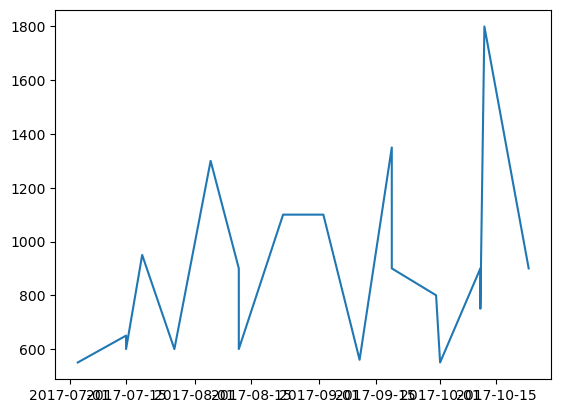

In [24]:
# Importando o pyplot
import matplotlib.pyplot as plt

# Constrói a plotagem
plt.plot(df['data'], df['aluguel'])

# Exibe a figura
plt.show()

Para não precisar chamar diretamente o método `show()` dentro do Jupyter Notebook, podemos executar o comando (mágica) `%matplotlib inline`.

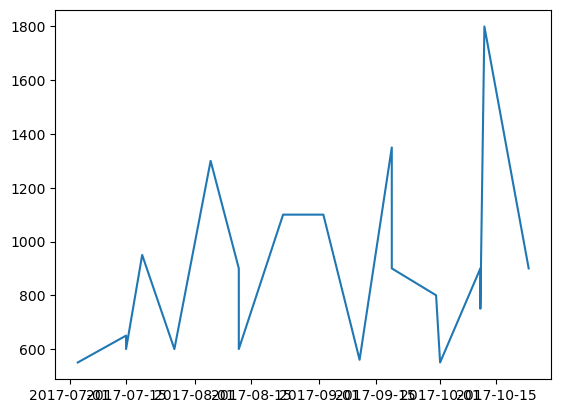

In [25]:
%matplotlib inline

plt.plot(df['data'], df['aluguel'])
plt.show()

No exemplo abaixo ajustamos tamanho, estilo e rótulos em uma plotagem. O parâmetro `or--` especifica marcadores circulares (o), com linha tracejada (--) da cor vermelha (r).

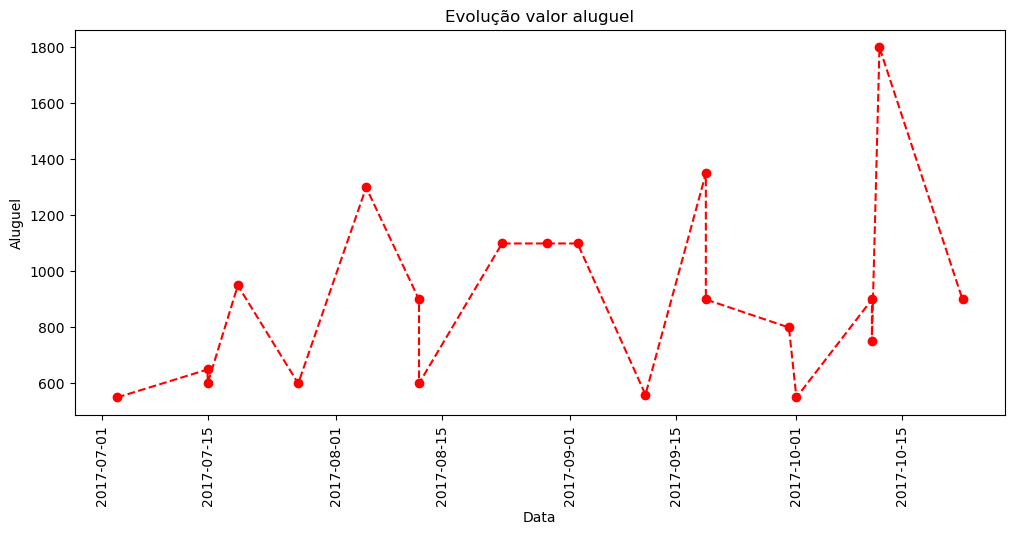

In [26]:
plt.figure(figsize=(12,5))
plt.plot(df['data'], df['aluguel'], "or--")
plt.title('Evolução valor aluguel')
plt.xlabel('Data')
plt.xticks(rotation='vertical')
plt.ylabel('Aluguel')
plt.show()

Para incluir outras linhas na plotagem, basta adicionar mais parâmetros na chamada do método:

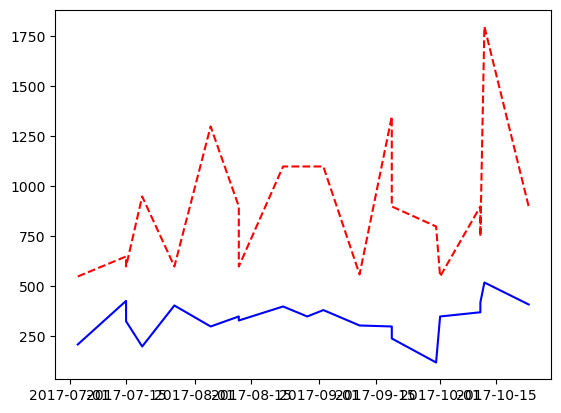

In [27]:
plt.plot(df['data'], df['aluguel'], "r--", df['data'], df['condominio'], "b-")
plt.show()

Um recurso útil é a criação de figuras com mais de uma plotagem (subplot). Abaixo definimos uma figura que tem duas linhas e uma coluna de plotagens. 

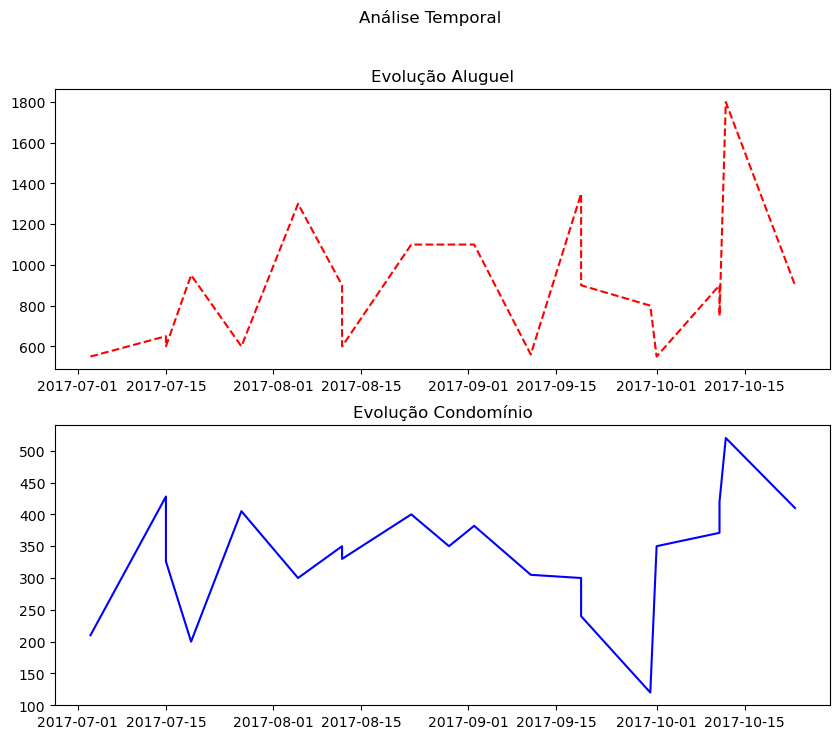

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(df['data'], df['aluguel'], "r--")
plt.title("Evolução Aluguel")

plt.subplot(2,1,2)
plt.plot(df['data'], df['condominio'], "b-")
plt.title("Evolução Condomínio")

plt.suptitle("Análise Temporal")
plt.show()

O matplotlib possui diversos tipos de plotagens, como barras e scatterplots:

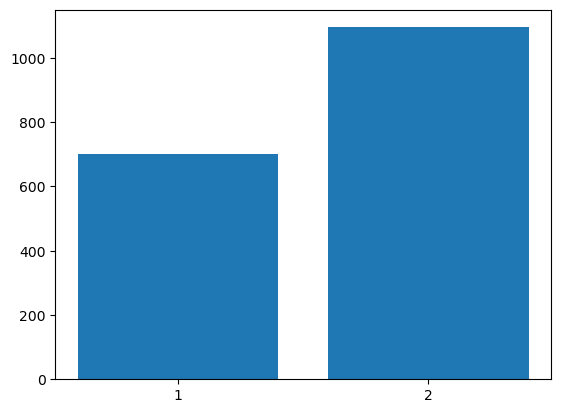

In [29]:
df_grouped = df.groupby('quartos')['aluguel'].mean().reset_index()

plt.bar(df_grouped['quartos'], df_grouped['aluguel'])
plt.xticks(df_grouped['quartos'])
plt.show()

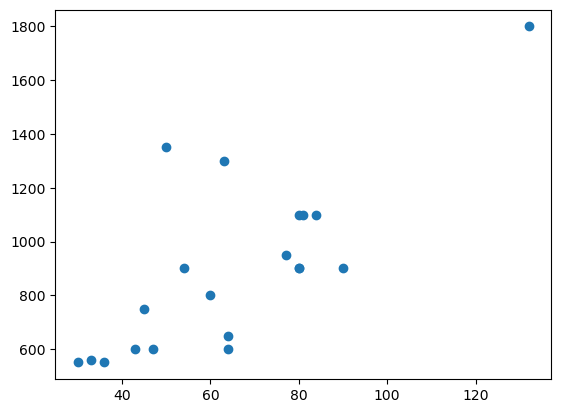

In [30]:
plt.scatter(df['area'], df['aluguel'])
plt.show()

O matplotlib também possui recursos avançados de plotagens em 3D:

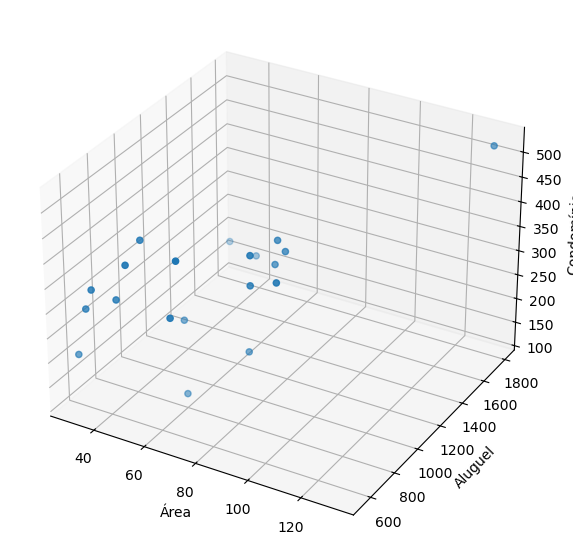

In [31]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(9,7))
ax = plt.axes(projection='3d')
ax.scatter(df['area'], df['aluguel'], df['condominio'])
ax.set_xlabel('Área')
ax.set_ylabel('Aluguel')
ax.set_zlabel('Condomínio')
plt.show()

### Referências

- Documentção do Matplotlib: [User's Guide](https://matplotlib.org/users/index.html)
